In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(index) for index in train_data])

9999

In [5]:
# loading reviews back to text
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
[reverse_word_index.get(i-3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
# encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimention=10000):
  results = np.zeros((len(sequences), dimention))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
from keras.api._v2.keras import activations
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [13]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

In [14]:
x_val = x_train[:10000]
partial_x_val = x_train[10000:]
y_val = y_train[:10000]
partial_y_val = y_train[10000:]

In [16]:
history = model.fit(partial_x_val, partial_y_val, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 120ms/step - loss: 0.5433 - accuracy: 0.7784 - val_loss: 0.4350 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 2s 53ms/step - loss: 0.3531 - accuracy: 0.8895 - val_loss: 0.3383 - val_accuracy: 0.8785
Epoch 3/20
30/30 [==============================] - 2s 52ms/step - loss: 0.2669 - accuracy: 0.9135 - val_loss: 0.2949 - val_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2187 - accuracy: 0.9275 - val_loss: 0.2903 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1833 - accuracy: 0.9410 - val_loss: 0.3010 - val_accuracy: 0.8786
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1575 - accuracy: 0.9489 - val_loss: 0.2764 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 3s 88ms/step - loss: 0.1377 - accuracy: 0.9567 - val_loss: 0.2826 - val_accuracy: 0.8865
Epoch 8/20
3

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

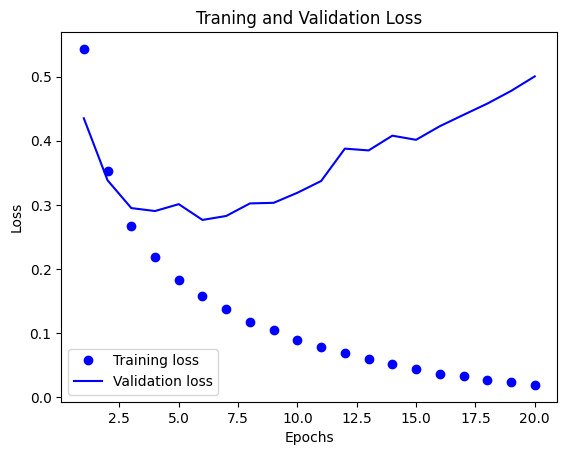

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.title("Traning and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

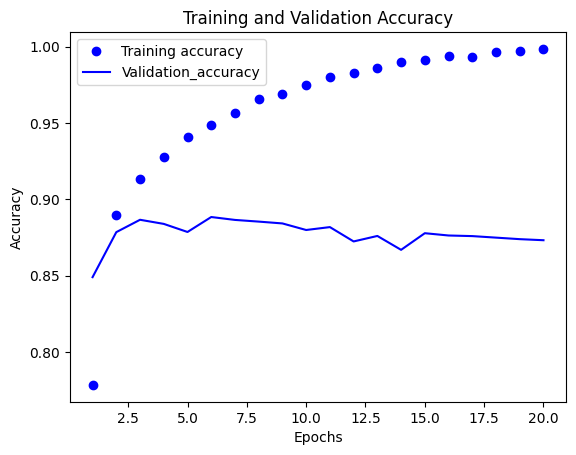

In [19]:
acc = history_dict["accuracy"]
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation_accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.4871 - accuracy: 0.8080
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2913 - accuracy: 0.8982
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2271 - accuracy: 0.9178
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2913 - accuracy: 0.8821


In [21]:
results

[0.29133138060569763, 0.8821200132369995]

In [22]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.17623885],
       [0.99938256],
       [0.7572591 ],
       ...,
       [0.08329633],
       [0.06486332],
       [0.4479333 ]], dtype=float32)